In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [25]:
r = 0.3
L_max = 30
k = 0.5
g = 0.2
alpha = 0.6
P = 10
gamma = 0.2
beta = 0.3

L0 = 10
I0 = 5

# this derivative function has a very specific format.. the inputs have to be X, t, then extra parameters
def derivative(X, t, r, L_max, k, g, alpha, beta, gamma, P):
    L, I = X
    dotL = r * L * (1-L/L_max) - k * I - g * L
    dotI = alpha * L * (1-I/P) + gamma * (1-I/P) - beta * I 
    return np.array([dotL, dotI])

In [27]:
Nt = 500 # number of timesteps between 0 and tmax
tmax = 30
t = np.linspace(0,tmax, Nt) # want to take small time steps to approximate continuous behavior as best as possible

# initial condition
X0 = [L0, I0]

# numerically solves ODEs
x,y = integrate.odeint(derivative, X0, t, args = (r, L_max, k, g, alpha, beta, gamma, P)).T




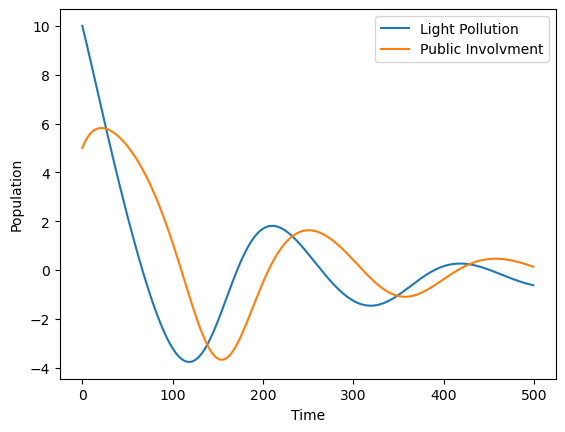

In [29]:
plt.plot(x, label='Light Pollution')
plt.plot(y, label='Public Involvment')

plt.xlabel('Time')
plt.ylabel('Population')

plt.legend()

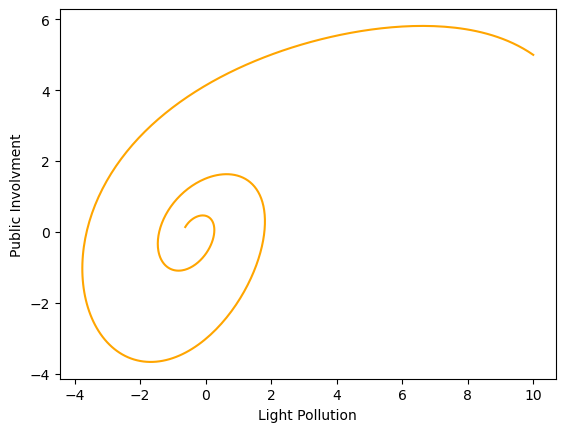

In [31]:
plt.plot(x,y,color='orange')

plt.xlabel('Light Pollution')
plt.ylabel('Public Involvment')
plt.savefig('plot.png')